### Simulation
Experiment design（設計不同規模 → 只要重要變項）
1. 物價水準 $\lambda$: 便宜(0.5) / 中等(1) / 貴(2)
2. 單日 budget eg. 低(2500) / 中(5000) / 高(10000)
3. Scale 包含 Small / Medium / Large
	 - 天數 $D$: 5 / 14 天（兩週） / 30 天（一個月）
	 - 景點數：50 / 150 / 300
	 - 飯店數：10 / 30 / 60
4. 觀光集群數：Cluster Number: $n_{cluster}$ (1/3/5)
5. 景點分佈密集度: $\sigma$ (0.75/1.5/3) km

| Variable                 | Small         | Medium        | Large         |
|--------------------------|-----------------|----------------|-----------------|
| Price Level ($\lambda$)  | Cheap (0.5)     | Medium (1)     | Expensive (2)   |
| Daily Budget (NTD)       | Low (2500)      | Medium (5000)  | High (10000)    |
| Scale                    | Small           | Medium         | Large           |
| Days ($D$)               | 5               | 14             | 30              |
| Number of Spots          | 50              | 150            | 300             |
| Number of Hotels         | 10              | 30             | 60              |
| Cluster Number ($n_{cluster}$) | 1        | 3              | 5               |
| Spot Density ($\sigma$ km) | 0.75 (compact) | 1.5 (moderate) | 3.0 (dispersed) |

In [3]:
from experiment import sample_city_experiment

# Example usage:
city_data = sample_city_experiment(
    n_cluster=3,
    cluster_sigma=3,
    n_spots=150,
    n_hotels=30,
    price_level_lambda=1
)
print("Cluster means:\n", city_data["clusters"])
print("First five hotel costs:\n", city_data["hotel_costs"][:5])
print("First five attraction open times (minutes):\n", city_data["attraction_open_times"][:5])
print("First five experience scores:\n", city_data["experience_scores"][:5])

Cluster means:
 [[ 16.98514882   1.69478297]
 [ -8.85442833  14.81175141]
 [-10.36494678 -14.44091384]]
First five hotel costs:
 [5324.22402021 3087.55781599 5728.98576061 3467.81983791 5042.52062436]
First five attraction open times (minutes):
 [360 420 360 540 360]
First five experience scores:
 [2.7854094  2.3342782  3.32190003 1.35506958 4.84666294]


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def plot_attractions_and_hotels_cost(city_data):
    clusters = city_data["clusters"]
    spots = city_data["spots"]
    hotels = city_data["hotels"]
    airports = np.array(city_data["airports"])
    hotel_costs = city_data["hotel_costs"]
    attraction_costs = city_data["attraction_costs"]

    plt.figure(figsize=(10, 10))

    # Attractions: color by cost (Blues)
    spots_scatter = plt.scatter(
        spots[:, 0], spots[:, 1], c=attraction_costs, cmap='Blues', s=40, marker='o', edgecolor='none', label="Attractions (cost)"
    )
    cbar1 = plt.colorbar(spots_scatter, shrink=0.7, pad=0.01)
    cbar1.set_label("Attraction Cost (NTD)")

    # Hotels: color by cost (YlOrRd), size a bit larger
    hotels_scatter = plt.scatter(
        hotels[:, 0], hotels[:, 1], c=hotel_costs, cmap='YlOrRd', s=80, marker='s', edgecolor='k', label="Hotels (cost)"
    )
    cbar2 = plt.colorbar(hotels_scatter, shrink=0.7, pad=0.04)
    cbar2.set_label("Hotel Cost (NTD)")

    # Clusters
    plt.scatter(clusters[:, 0], clusters[:, 1], c='red', marker='*', s=300, label='Cluster Center')

    # Airports
    plt.scatter(airports[:, 0], airports[:, 1], c='green', marker='^', s=200, edgecolor='black', label='Airport')
    for idx, a in enumerate(airports):
        plt.text(a[0], a[1], f"A{idx+1}", fontsize=14, fontweight='bold',
                 ha='center', va='center', color='black',
                 bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', boxstyle='round,pad=0.2'))

    plt.xlabel("X (km)")
    plt.ylabel("Y (km)")
    plt.title("Attractions (Blues) and Hotels (YlOrRd) Colored by Cost")
    plt.grid(alpha=0.3)
    plt.legend(loc="upper left", fontsize=12)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

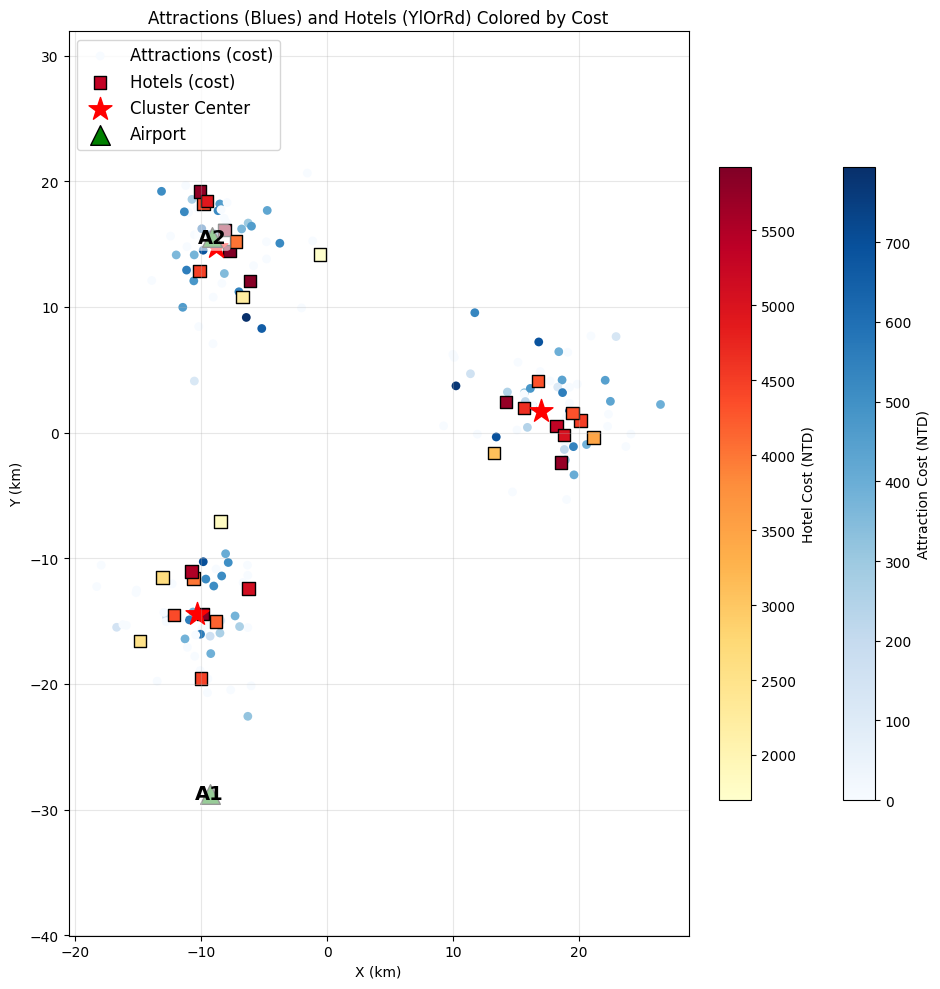

In [5]:
# Example usage:
plot_attractions_and_hotels_cost(city_data)

### Simulation
- Scale: Large 調整 21 --> 14

In [1]:
import random

## Unadjusted version
scale_dict = {
    "small":{"D": 3, "I": 25, "M": 5, "lambda": 0.5, "Budget": 2500, "n_cluster": 1, "sigma": 0.75},
    "medium":{"D": 7, "I": 75, "M": 25, "lambda": 1, "Budget": 5000, "n_cluster": 3, "sigma": 1.5},
    "large":{"D": 14, , "I": 150, "M": 50, "lambda": 2, "Budget": 10000, "n_cluster": 5, "sigma": 3}
}

# # Also in the experiment.py file 
# scenario_dict = {
#     1: {"scale": "medium", "lambda": "medium", "Budget": "medium", "n_cluster": "medium", "sigma": "medium"},
#     2: {"scale": "small", "lambda": "medium", "Budget": "medium", "n_cluster": "medium", "sigma": "medium"},
#     3: {"scale": "large", "lambda": "medium", "Budget": "medium", "n_cluster": "medium", "sigma": "medium"},
#     4: {"scale": "medium", "lambda": "small", "Budget": "medium", "n_cluster": "medium", "sigma": "medium"},
#     5: {"scale": "medium", "lambda": "large", "Budget": "medium", "n_cluster": "medium", "sigma": "medium"},
#     6: {"scale": "medium", "lambda": "medium", "Budget": "small", "n_cluster": "medium", "sigma": "medium"},
#     7: {"scale": "medium", "lambda": "medium", "Budget": "large", "n_cluster": "medium", "sigma": "medium"},
#     8: {"scale": "medium", "lambda": "medium", "Budget": "medium", "n_cluster": "small", "sigma": "medium"},
#     9: {"scale": "medium", "lambda": "medium", "Budget": "medium", "n_cluster": "large", "sigma": "medium"},
#     10: {"scale": "medium", "lambda": "medium", "Budget": "medium", "n_cluster": "medium", "sigma": "small"},
#     11: {"scale": "medium", "lambda": "medium", "Budget": "medium", "n_cluster": "medium", "sigma": "large"},
# } 

### Experiment Test on LR
- Test on Large scale: 25days, 150 attractions, 50 hotels

In [1]:
from experiment import *
import numpy as np
import pandas as pd
import random

random.seed(42)
np.random.seed(42)

# Simulation example: 1-11
data = simulation(scenario_number=3, scale_dict)

budget = data['BUDGET']
num_days = data['D']
num_hotels = data['M']  
num_attractions = data['I']
num_places = data['P']
num_transport_modes = data['K']

# S_M = [m for m in range(1, data['M'] + 1)]  #  the first hotel is the starting airport and the last hotel is the leaving airport
# S_I = [i for i in range(1, data['I'] + 1)]
# S_P = [p for p in range(1, data['I'] + data['M'] + 1)]
# S_D = [d for d in range(1, data['D'] + 1)]
# S_K = [k for k in range(1, data['K'] + 1)]

S_M = [m for m in range(0, data['M'])]  #  the first hotel is the starting airport and the last hotel is the leaving airport
S_I = [i for i in range(0, data['I'])]
S_P = [p for p in range(0, data['I'] + data['M'])]
S_D = [d for d in range(0, data['D'])]
S_K = [k for k in range(0, data['K'])]




# 第一天抵達機場時間
arrival_time_day1 = data['Day1Arrival'] # 需要從 Excel 讀取

# 每天離開旅館的時間 (不包含第一天和最後一天)
departure_time_hotel = data['LH'] # 需要從 Excel 讀取
departure_time_hotel = departure_time_hotel.reset_index(drop=True)

# 每天返回旅館的最晚時間
return_time_hotel = data['RH']    # 需要從 Excel 讀取
return_time_hotel = return_time_hotel.reset_index(drop=True)

# 每個景點的停留時間 (表格，索引為景點 i)
stay_duration = data['STAY']      # 需要從 Excel 讀取 (DataFrame 或 dict)
stay_duration = stay_duration.reset_index(drop=True)

# 每個景點的成本 (表格，索引為景點 i)
spot_costs = data['C_ATTRACTION']         # 需要從 Excel 讀取 (DataFrame 或 dict)

# 每個景點的幸福值 (表格，索引為景點 i)
happiness_values = data['HAPPINESS']    # 需要從 Excel 讀取 (DataFrame 或 dict)
happiness_values = happiness_values.reset_index(drop=True)

# 每個景點每天的開放時間 (表格，索引為景點 i 和天 d)
open_times = data['ATTRACTION_OPEN']          # 需要從 Excel 讀取 (DataFrame 或 dict)

# 每個景點每天的關閉時間 (表格，索引為景點 i 和天 d)
close_times = data['ATTRACTION_CLOSE']         # 需要從 Excel 讀取 (DataFrame 或 dict)

# 旅館每天的住宿成本 (表格，索引為旅館 m 和天 d，不包含起始和結束機場)
hotel_costs = data['C_HOTEL']        # 需要從 Excel 讀取 (DataFrame 或 dict)

# 地點 p 到地點 q 使用交通方式 k 的交通時間 (表格，索引為 p, q, k)
transport_times = data['DURATION']      # 需要從 Excel 讀取 (DataFrame 或 MultiIndex DataFrame 或 dict)
transport_times = np.stack(list(transport_times.values()))
# 地點 p 到地點 q 使用交通方式 k 的交通成本 (表格，索引為 p, q, k)
transport_costs = data['C_TRAVEL']     # 需要從 Excel 讀取 (DataFrame 或 MultiIndex DataFrame 或 dict)
transport_costs = np.stack(list(transport_costs.values()))


print(f"Budget: {budget}")
print(f"Number of days: {num_days}")
print(f"Number of hotels: {num_hotels}")
print(f"Number of attractions: {num_attractions}")
print(f"Number of places: {num_places}")
print(f"Number of transport modes: {num_transport_modes}")

print("Sets:")
print(f"S_M: {S_M}")
print(f"S_I: {S_I}")
print(f"S_P: {S_P}")
print(f"S_D: {S_D}")
print(f"S_K: {S_K}")

M = S_M
I = S_I
P = S_P
D = S_D
K = S_K

#重要!補0
stay_duration = pd.concat([stay_duration, pd.Series(0 for _ in range(num_hotels))], ignore_index=True)
stay_duration

print(f"Day 1 Arrival Time: {arrival_time_day1}")
print(f"Departure Time from Hotel: {departure_time_hotel}")
print(f"Return Time to Hotel: {return_time_hotel}")
print(f"Stay Duration: {stay_duration}")
print(f"Spot Costs: {spot_costs}")
print(f"Happiness Values: {happiness_values}")
print(f"Open Times: {open_times}")
print(f"Close Times: {close_times}")
print(f"Hotel Costs: {hotel_costs}")
print(f"Transport Times: {transport_times}", transport_times.shape)
print(f"Transport Costs: {transport_costs}", transport_costs.shape)

Budget: 105000
Number of days: 21
Number of hotels: 52
Number of attractions: 250
Number of places: 302
Number of transport modes: 3
Sets:
S_M: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
S_I: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 1

In [ ]:
bigM = 1440
# ----- 3. 建立 Gurobi 模型 -----
import gurobipy as gp
from gurobipy import GRB
print("Creating model...")
model = gp.Model("travel_planning")
print("Model created.")

# ----- 4. 定義決策變數 Linear Relaxation Version -----
x = model.addVars(S_I, S_D, vtype=GRB.CONTINUOUS, lb=0.0, ub=1.0, name="visit")
t = model.addVars(S_P, S_P, S_K, S_D, vtype=GRB.CONTINUOUS, lb=0.0, ub=1.0, name="travel")
ha = model.addVars(S_M, S_D, vtype=GRB.CONTINUOUS, lb=0.0, ub=1.0, name="arrive_hotel")
hl = model.addVars(S_M, S_D, vtype=GRB.CONTINUOUS, lb=0.0, ub=1.0, name="leave_hotel")
a = model.addVars(S_P, S_D, vtype=GRB.CONTINUOUS, lb=0.0, name="arrival_time")
print("Defined variables:")

# ----- 5. 設定目標函數 -----
# i 是從 num_hotels + 2 機場 + 1 開始算起，例如 instance0 中 i 從 4 開始
# 但是 happiness_values 等參數的 index 是從 0 開始算起
# 所以在 index 這邊就扣會回去
model.setObjective(gp.quicksum(happiness_values[i] * x[i, d] for d in S_D for i in S_I), GRB.MAXIMIZE)
print("Objective function set.")   


# ----- 6. 加入約束條件 -----
#預算約束 (equation 2)
model.addConstr(
    gp.quicksum(transport_costs[k,p,q] * t[p, q, k, d] for d in S_D for p in S_P for q in S_P if p != q for k in S_K)
    + gp.quicksum(hotel_costs[d,m] * ha[m, d] for m in S_M[1:-1] for d in S_D) 
    + gp.quicksum(spot_costs[i] * x[i, d] for d in S_D for i in S_I) <= budget,
    "budget_constraint"
    )
# 第一天抵達機場時間 (equation 3) delete
#model.addConstr(a[0, 0] == arrival_time_day1, "arrival_day1")

# 其他天離開旅館時間 (equation 4) delete
# for d in D[1:]:
#     for m in M[1:-1]:
#         model.addConstr(a[m, d] == departure_time_hotel[d] * hl[m, d], f"departure_hotel_{m}_{d}")

# 抵達景點時間下限 (equation 5)
for i in I:
    for d in D:
        model.addConstr(a[i, d] >= departure_time_hotel[d] * x[i, d], f"arrival_spot_lower_{i}_{d}")

# 景點開放時間約束 (equation 6)
for i in I:
    for d in D:
        model.addConstr(a[i, d] >= open_times[i,d] * x[i, d], f"open_time_{i}_{d}")

# 定義一個足夠大的時間值，用於取代無限大 (Infinity)
# 假設您的時間單位是小時，一天有 24 小時，最多5天，那麼 1000 是一個保守的足夠大的數
MAX_POSSIBLE_TIME = 10000.0 # 例如，用 10000 分鐘代表"無限大"

#景點關閉時間約束 (equation 7)
for i in I:
    for d in D:
        # 將 float('inf') 替換為 MAX_POSSIBLE_TIME
        model.addConstr(a[i, d] + stay_duration[i] * x[i, d] <= close_times[i,d] * x[i, d], f"close_time_{i}_{d}")

# --- 新增的住宿地點相關約束 ---

# 不可以跑回去睡機場 (離開)
# h^l_{1d} = 0, forall d in D \setminus \{1\}
for d in D:
    if d != 0:
        model.addConstr(hl[0, d] == 0, f"no_leave_start_airport_{d}")

# 不可以跑回去睡機場 (抵達)
# h^a_{n_md} = 0, forall d in D \setminus \{n_d\}
for d in D:
    if d != num_days - 1: # num_days 是您之前定義的總天數
        model.addConstr(ha[num_hotels - 1, d] == 0, f"no_arrive_end_airport_{d}")


# ... (您後續的其他約束，例如每天只能住一間旅館等)

# 第一天返回旅館時間約束 (equation 8)
model.addConstr(
    arrival_time_day1 +
    gp.quicksum(stay_duration[i] * x[i, 0] for i in I) +
    gp.quicksum(transport_times[k,p,q] * t[p, q, k, 0] for p in P for q in P if p != q for k in K) <= return_time_hotel[0],
    "return_day1"
)

# 其他天返回旅館時間約束 (equation 9)
for d in D[1:]:
    model.addConstr(
        departure_time_hotel[d] + 
        gp.quicksum(stay_duration[i] * x[i, d] for i in I) +
        gp.quicksum(transport_times[k,p,q] * t[p, q, k, d] for p in P for q in P if p != q for k in K) <= return_time_hotel[d],
        f"return_day_{d}"
    )

# 同一天內地點間移動的時間約束 (equation 10)

#從hotel 出發 (new equation)
for d in D:
    for q in P:
        travel_time_expr = gp.quicksum(transport_times[k,num_attractions+m,q] * t[num_attractions+m, q, k, d] for k in K for m in M)
        lhs = departure_time_hotel[d]  + travel_time_expr - a[q, d]
        rhs = bigM * (1 - gp.quicksum(t[num_attractions+m, q, k, d] for k in K for m in M))
        #print(f"p=hotel, q={q}, d={d}, lhs={lhs}, rhs={rhs}") # <--- 在這裡添加 print 語句
        model.addConstr(lhs <= rhs, f"travel_time_hotel_{q}_{d}")

#from tourist spots to other places (updated equation 10)
for i in I:
    for q in P:
        if i != q:
            for d in D:
                travel_time_expr = gp.quicksum(transport_times[k,i,q] * t[i, q, k, d] for k in K)
                lhs = a[i, d] + stay_duration[i] + travel_time_expr - a[q, d]
                rhs = bigM * (1 - gp.quicksum(t[i, q, k, d] for k in K))
                #print(f"p={i}, q={q}, d={d}, lhs={lhs}, rhs={rhs}") # <--- 在這裡添加 print 語句
                model.addConstr(lhs <= rhs, f"travel_time_{i}_{q}_{d}")


# 每個景點最多參觀一次 (equation 11)
for i in I:
    model.addConstr(gp.quicksum(x[i, d] for d in D) <= 1, f"visit_once_{i}")

# 每天必須抵達一個旅館(equation 12)
for d in D:
    model.addConstr(gp.quicksum(ha[m, d] for m in M) == 1, f"arrive_one_hotel_{d}")

# 如果今晚抵達旅館 m，明天早上必須從同一旅館 m 出發(最後一天除外) (equation 13)
for m in M:
    for d in D[:-1]:
        model.addConstr(ha[m, d] == hl[m, d + 1], f"hotel_continuity_{m}_{d}")

# 第一天早上必須離開機場 (equation 14)
model.addConstr(hl[0, 0] == 1, "leave_airport_day1")

# 最後一天晚上必須抵達機場 (equation 15)
model.addConstr(ha[num_hotels - 1, num_days - 1] == 1, "arrive_airport_last_day")

# 離開景點後的去向 (equation 16) - 修改為逐日約束
for i in I:
    for d in D: # 新增 d 的外層循環
        model.addConstr(
            gp.quicksum(t[i, j, k, d] for j in I for k in K if i != j) + 
            gp.quicksum(t[i, num_attractions + m, k, d] for m in M for k in K) == x[i, d], 
            f"leave_spot_{i}_{d}" # 修改約束名稱以包含 d
        )

# 前往景點的起點 (equation 17) - 修改為逐日約束
for i in I:
    for d in D: # 新增 d 的外層循環
        model.addConstr(
            gp.quicksum(t[j, i, k, d] for j in I for k in K if i != j) + # 移除 d 的循環
            gp.quicksum(t[num_attractions + m, i, k, d] for m in M for k in K) == x[i, d], # 移除 d 的循環
            f"arrive_spot_{i}_{d}" # 修改約束名稱以包含 d
        )

# 早上離開旅館後的去向 (equation 18)
for m in M:
    for d in D:
        model.addConstr(
            gp.quicksum(t[num_attractions + m, q, k, d] for q in P if q != (num_attractions + m) for k in K) == hl[m, d],
            f"leave_hotel_to_spot_{m}_{d}"
        )

# 晚上離開景點後要去旅館 (equation 19)
for m in M:
    for d in D:
        model.addConstr(
            gp.quicksum(t[j, num_attractions + m, k, d] for j in I for k in K) == ha[m, d],
            f"arrive_hotel_from_spot_{m}_{d}"
        )

# 每個地方一天只能到達一次 (new equation)
for d in D:
    for q in P:
        model.addConstr(
            gp.quicksum(t[p, q, k, d] for p in P if p != q for k in K) <= 1,
            f"arrive_maximumn_once_at_each_spot{q}_on_each_day_{d}"
        )

# 每個地方只能用一種交通方式抵達 (new equation)
for d in D:
    for p in P:
        for q in P:
            model.addConstr(
                gp.quicksum(t[p, q, k, d] for k in K) <= 1,
                f"one transportation type{p}_{q}_{d}"
            )



# ----- 7. 求解模型 -----
#model.setParam('Memlimit', 7)
model.optimize()

Creating model...
Set parameter Username
Set parameter LicenseID to value 2657328
Academic license - for non-commercial use only - expires 2026-04-28
Model created.
Defined variables:
Objective function set.
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (mac64[arm] - Darwin 24.4.0 24E263)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 3538027 rows, 5759628 columns and 41262607 nonzeros
Model fingerprint: 0x284590a2
Coefficient statistics:
  Matrix range     [1e-02, 6e+03]
  Objective range  [1e+00, 5e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+05]
Presolve removed 318040 rows and 132475 columns (presolve time = 5s)...
Presolve removed 320021 rows and 133475 columns (presolve time = 10s)...
Presolve removed 320021 rows and 133475 columns (presolve time = 15s)...
Presolve removed 320021 rows and 133475 columns
Presolve time: 18.84s
Presolved: 3218006 rows, 5626153 columns, 39051002 nonzer

### LR Experiment on New Large Scale / New MILP LR

In [3]:
from experiment import *
import numpy as np
import pandas as pd
import random

random.seed(42)
np.random.seed(42)

scale_dict = {
    "small":{"D": 3, "I": 25, "M": 5, "lambda": 0.5, "Budget": 2500, "n_cluster": 1, "sigma": 0.75},
    "medium":{"D": 7, "I": 75, "M": 15, "lambda": 1, "Budget": 5000, "n_cluster": 3, "sigma": 1.5},
    "large":{"D": 14, "I": 150, "M": 30, "lambda": 2, "Budget": 10000, "n_cluster": 5, "sigma": 3}
}

## 11 scenarios
random.seed(42)
np.random.seed(42)

data = simulation(scenario_number=3, scale_dict=scale_dict)

budget = data['BUDGET']
num_days = data['D']
num_hotels = data['M']  
num_attractions = data['I']
num_places = data['P']
num_transport_modes = data['K']

S_M = [m for m in range(0, data['M'])]  #  the first hotel is the starting airport and the last hotel is the leaving airport
S_I = [i for i in range(0, data['I'])]
S_P = [p for p in range(0, data['I'] + data['M'])]
S_D = [d for d in range(0, data['D'])]
S_K = [k for k in range(0, data['K'])]


# 第一天抵達機場時間
arrival_time_day1 = data['Day1Arrival'] # 需要從 Excel 讀取

# 每天離開旅館的時間 (不包含第一天和最後一天)
departure_time_hotel = data['LH'] # 需要從 Excel 讀取
departure_time_hotel = departure_time_hotel.reset_index(drop=True)

# 每天返回旅館的最晚時間
return_time_hotel = data['RH']    # 需要從 Excel 讀取
return_time_hotel = return_time_hotel.reset_index(drop=True)

# 每個景點的停留時間 (表格，索引為景點 i)
stay_duration = data['STAY']      # 需要從 Excel 讀取 (DataFrame 或 dict)
stay_duration = stay_duration.reset_index(drop=True)

# 每個景點的成本 (表格，索引為景點 i)
spot_costs = data['C_ATTRACTION']         # 需要從 Excel 讀取 (DataFrame 或 dict)

# 每個景點的幸福值 (表格，索引為景點 i)
happiness_values = data['HAPPINESS']    # 需要從 Excel 讀取 (DataFrame 或 dict)
happiness_values = happiness_values.reset_index(drop=True)

# 每個景點每天的開放時間 (表格，索引為景點 i 和天 d)
open_times = data['ATTRACTION_OPEN']          # 需要從 Excel 讀取 (DataFrame 或 dict)

# 每個景點每天的關閉時間 (表格，索引為景點 i 和天 d)
close_times = data['ATTRACTION_CLOSE']         # 需要從 Excel 讀取 (DataFrame 或 dict)

# 旅館每天的住宿成本 (表格，索引為旅館 m 和天 d，不包含起始和結束機場)
hotel_costs = data['C_HOTEL']        # 需要從 Excel 讀取 (DataFrame 或 dict)

# 地點 p 到地點 q 使用交通方式 k 的交通時間 (表格，索引為 p, q, k)
transport_times = data['DURATION']      # 需要從 Excel 讀取 (DataFrame 或 MultiIndex DataFrame 或 dict)
transport_times = np.stack(list(transport_times.values()))
# 地點 p 到地點 q 使用交通方式 k 的交通成本 (表格，索引為 p, q, k)
transport_costs = data['C_TRAVEL']     # 需要從 Excel 讀取 (DataFrame 或 MultiIndex DataFrame 或 dict)
transport_costs = np.stack(list(transport_costs.values()))

M = S_M
I = S_I
P = S_P
D = S_D
K = S_K

#重要!補 0
stay_duration = pd.concat([stay_duration, pd.Series(0 for _ in range(num_hotels))], ignore_index=True)

In [5]:
bigM = 1440
# ----- 3. 建立 Gurobi 模型 -----
import gurobipy as gp
from gurobipy import GRB
print("Creating model...")
model = gp.Model("travel_planning")
print("Model created.")

# ----- 4. 定義決策變數 Linear Relaxation Version -----
x = model.addVars(S_I, S_D, vtype=GRB.CONTINUOUS, lb=0.0, ub=1.0, name="visit")
t = model.addVars(S_P, S_P, S_K, S_D, vtype=GRB.CONTINUOUS, lb=0.0, ub=1.0, name="travel")
ha = model.addVars(S_M, S_D, vtype=GRB.CONTINUOUS, lb=0.0, ub=1.0, name="arrive_hotel")
hl = model.addVars(S_M, S_D, vtype=GRB.CONTINUOUS, lb=0.0, ub=1.0, name="leave_hotel")
a = model.addVars(S_P, S_D, vtype=GRB.CONTINUOUS, lb=0.0, name="arrival_time")
lt = model.addVars(S_D, vtype=GRB.CONTINUOUS, name="arrival_time")
print("Defined variables:")

# ----- 5. 設定目標函數 -----
# i 是從 num_hotels + 2 機場 + 1 開始算起，例如 instance0 中 i 從 4 開始
# 但是 happiness_values 等參數的 index 是從 0 開始算起
# 所以在 index 這邊就扣會回去
model.setObjective(gp.quicksum(happiness_values[i] * x[i, d] for d in S_D for i in S_I), GRB.MAXIMIZE)
print("Objective function set.")   


# ----- 6. 加入約束條件 -----
#預算約束 (equation 2)
model.addConstr(
    gp.quicksum(transport_costs[k,p,q] * t[p, q, k, d] for d in S_D for p in S_P for q in S_P if p != q for k in S_K)
    + gp.quicksum(hotel_costs[d,m] * ha[m, d] for m in S_M[1:-1] for d in S_D) 
    + gp.quicksum(spot_costs[i] * x[i, d] for d in S_D for i in S_I) <= budget,
    "budget_constraint"
    )
# 第一天抵達機場時間 (equation 3) delete
#model.addConstr(a[0, 0] == arrival_time_day1, "arrival_day1")

# 其他天離開旅館時間 (equation 4) delete
# for d in D[1:]:
#     for m in M[1:-1]:
#         model.addConstr(a[m, d] == departure_time_hotel[d] * hl[m, d], f"departure_hotel_{m}_{d}")

# 抵達景點時間下限 (equation 5)
for i in I:
    for d in D:
        model.addConstr(a[i, d] >= departure_time_hotel[d] * x[i, d], f"arrival_spot_lower_{i}_{d}")

# 景點開放時間約束 (equation 6)
for i in I:
    for d in D:
        model.addConstr(a[i, d] >= open_times[i,d] * x[i, d], f"open_time_{i}_{d}")

# 定義一個足夠大的時間值，用於取代無限大 (Infinity)
# 假設您的時間單位是小時，一天有 24 小時，最多5天，那麼 1000 是一個保守的足夠大的數
MAX_POSSIBLE_TIME = 10000.0 # 例如，用 10000 分鐘代表"無限大"

#景點關閉時間約束 (equation 7)
for i in I:
    for d in D:
        # 將 float('inf') 替換為 MAX_POSSIBLE_TIME
        model.addConstr(a[i, d] + stay_duration[i] * x[i, d] <= close_times[i,d] * x[i, d], f"close_time_{i}_{d}")

# --- 新增的住宿地點相關約束 ---

# 不可以跑回去睡機場 (離開)
# h^l_{1d} = 0, forall d in D \setminus \{1\}
for d in D:
    if d != 0:
        model.addConstr(hl[0, d] == 0, f"no_leave_start_airport_{d}")

# 不可以跑回去睡機場 (抵達)
# h^a_{n_md} = 0, forall d in D \setminus \{n_d\}
for d in D:
    if d != num_days - 1: # num_days 是您之前定義的總天數
        model.addConstr(ha[num_hotels - 1, d] == 0, f"no_arrive_end_airport_{d}")


# ... (您後續的其他約束，例如每天只能住一間旅館等)

# 第一天返回旅館時間約束 (equation 8)
model.addConstr(
    arrival_time_day1 +
    gp.quicksum(stay_duration[i] * x[i, 0] for i in I) +
    gp.quicksum(transport_times[k,p,q] * t[p, q, k, 0] for p in P for q in P if p != q for k in K) <= return_time_hotel[0],
    "return_day1"
)

# 其他天返回旅館時間約束 (equation 9)
for d in D[1:]:
    model.addConstr(
        lt[d] + 
        gp.quicksum(stay_duration[i] * x[i, d] for i in I) +
        gp.quicksum(transport_times[k,p,q] * t[p, q, k, d] for p in P for q in P if p != q for k in K) <= return_time_hotel[d],
        f"return_day_{d}"
    )

# 同一天內地點間移動的時間約束 (equation 10)

#從hotel 出發 (new equation)
for d in D:
    for q in P:
        travel_time_expr = gp.quicksum(transport_times[k,num_attractions+m,q] * t[num_attractions+m, q, k, d] for k in K for m in M)
        lhs = lt[d]  + travel_time_expr - a[q, d]
        rhs = bigM * (1 - gp.quicksum(t[num_attractions+m, q, k, d] for k in K for m in M))
        #print(f"p=hotel, q={q}, d={d}, lhs={lhs}, rhs={rhs}") # <--- 在這裡添加 print 語句
        model.addConstr(lhs <= rhs, f"travel_time_hotel_{q}_{d}")

#from tourist spots to other places (updated equation 10)
for i in I:
    for q in P:
        if i != q:
            for d in D:
                travel_time_expr = gp.quicksum(transport_times[k,i,q] * t[i, q, k, d] for k in K)
                lhs = a[i, d] + stay_duration[i] + travel_time_expr - a[q, d]
                rhs = bigM * (1 - gp.quicksum(t[i, q, k, d] for k in K))
                #print(f"p={i}, q={q}, d={d}, lhs={lhs}, rhs={rhs}") # <--- 在這裡添加 print 語句
                model.addConstr(lhs <= rhs, f"travel_time_{i}_{q}_{d}")


# 每個景點最多參觀一次 (equation 11)
for i in I:
    model.addConstr(gp.quicksum(x[i, d] for d in D) <= 1, f"visit_once_{i}")

# 每天必須抵達一個旅館(equation 12)
for d in D:
    model.addConstr(gp.quicksum(ha[m, d] for m in M) == 1, f"arrive_one_hotel_{d}")

# 如果今晚抵達旅館 m，明天早上必須從同一旅館 m 出發(最後一天除外) (equation 13)
for m in M:
    for d in D[:-1]:
        model.addConstr(ha[m, d] == hl[m, d + 1], f"hotel_continuity_{m}_{d}")

# 第一天早上必須離開機場 (equation 14)
model.addConstr(hl[0, 0] == 1, "leave_airport_day1")

# 最後一天晚上必須抵達機場 (equation 15)
model.addConstr(ha[num_hotels - 1, num_days - 1] == 1, "arrive_airport_last_day")

# 離開景點後的去向 (equation 16) - 修改為逐日約束
for i in I:
    for d in D: # 新增 d 的外層循環
        model.addConstr(
            gp.quicksum(t[i, j, k, d] for j in I for k in K if i != j) + 
            gp.quicksum(t[i, num_attractions + m, k, d] for m in M for k in K) == x[i, d], 
            f"leave_spot_{i}_{d}" # 修改約束名稱以包含 d
        )

# 前往景點的起點 (equation 17) - 修改為逐日約束
for i in I:
    for d in D: # 新增 d 的外層循環
        model.addConstr(
            gp.quicksum(t[j, i, k, d] for j in I for k in K if i != j) + # 移除 d 的循環
            gp.quicksum(t[num_attractions + m, i, k, d] for m in M for k in K) == x[i, d], # 移除 d 的循環
            f"arrive_spot_{i}_{d}" # 修改約束名稱以包含 d
        )

# 早上離開旅館後的去向 (equation 18) -update:可以留在旅館裡
for m in M:
    for d in D:
        model.addConstr(
            gp.quicksum(t[num_attractions + m, q, k, d] for q in P for k in K) == hl[m, d],
            f"leave_hotel_to_spot_{m}_{d}"
        )

# 晚上離開景點(旅館)後要去旅館 (equation 19)
for m in M:
    for d in D:
        model.addConstr(
            gp.quicksum(t[p, num_attractions + m, k, d] for p in P for k in K) == ha[m, d],
            f"arrive_hotel_from_spot_{m}_{d}"
        )

# 每個地方一天只能到達一次 (new equation)
for d in D:
    for q in P:
        model.addConstr(
            gp.quicksum(t[p, q, k, d] for p in P for k in K) <= 1,
            f"arrive_maximumn_once_at_each_spot{q}_on_each_day_{d}"
        )

# 每個地方只能用一種交通方式抵達 (new equation)
for d in D:
    for p in P:
        for q in P:
            model.addConstr(
                gp.quicksum(t[p, q, k, d] for k in K) <= 1,
                f"one transportation type{p}_{q}_{d}"
            )

#離開時間要大於使用者設定的時間 (new equation)
for d in D:
    model.addConstr(
        lt[d] >= departure_time_hotel[d],
        f"leavetime_{d}"
    )


# ----- 7. 求解模型 -----
model.optimize()

Creating model...
Model created.
Defined variables:
Objective function set.
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (mac64[arm] - Darwin 24.4.0 24E263)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 860965 rows, 1396766 columns and 10033007 nonzeros
Model fingerprint: 0xf293259e
Coefficient statistics:
  Matrix range     [4e-02, 6e+03]
  Objective range  [1e+00, 5e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+04]
Presolve removed 86137 rows and 53036 columns
Presolve time: 3.19s
Presolved: 774828 rows, 1343730 columns, 9366114 nonzeros

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Elapsed ordering time = 5s
Elapsed ordering time = 10s
Ordering time: 12.09s

Barrier statistics:
 Dense cols : 2100
 AA' NZ     : 5.829e+06
 Factor NZ  : 1.528e+07 (roughly 1.0 GB of memory)
 Factor Ops : 1.780e+10 (less than 1 second per iteration)
 Thre

In [9]:
# ----- 8. 輸出結果 -----
if model.status == GRB.OPTIMAL:
    print("\n========== Linear Relaxation Result ==========")
    print(f"Objective (Max total happiness): {model.objVal:.4f}")
    print(f"Solved in {model.Runtime:.2f} seconds")
    print("----------------------------------------------")

    # --- Arrival Times ---
    print("\n--- Arrival Times (a[p, d]) ---")
    for p in P:
        for d in D:
            val = a[p, d].X
            if val is not None and val > 1e-5:
                print(f"Arrive at place {p:<3} on day {d:<2}: {val/60:8.2f}")

    # --- Visited Spots (fractional x[i, d]) ---
    print("\n--- Fractional Visits (x[i, d]) ---")
    for i in I:
        for d in D:
            val = x[i, d].X
            if val > 1e-3:
                print(f"Spot {i:<3} on day {d:<2}: visit fraction {val/60:6.3f}")

    # --- Travel Modes (fractional t[p, q, k, d]) ---
    print("\n--- Fractional Travels (t[p, q, k, d]) ---")
    for p in P:
        for q in P:
            if p == q:
                continue
            for d in D:
                for k in K:
                    val = t[p, q, k, d].X
                    if val > 1e-3:
                        print(f"Day {d:<2}: {p:>2} → {q:>2} via mode {k}: fraction {val/60:6.3f}")

    # --- Hotel Arrivals/Leaves (ha, hl) ---
    print("\n--- Fractional Hotel Arrivals (ha[m, d]) ---")
    for m in M:
        for d in D:
            val = ha[m, d].X
            if val > 1e-3:
                print(f"Arrive hotel {m:<2} on day {d:<2}: {val/60:6.3f}")

    print("\n--- Fractional Hotel Leaves (hl[m, d]) ---")
    for m in M:
        for d in D:
            val = hl[m, d].X
            if val > 1e-3:
                print(f"Leave hotel {m:<2} on day {d:<2}: {val/60:6.3f}")

    print("==============================================")

elif model.status == GRB.INFEASIBLE:
    print("\n========== Linear Relaxation Result ==========")
    print("Model is infeasible (無可行解)")
    print("Consider checking constraints for conflicts.")
    model.computeIIS()
    model.write("infeasible.ilp")
    print("Infeasible constraints written to infeasible.ilp")
    print("==============================================")
else:
    print("\n========== Linear Relaxation Result ==========")
    print(f"模型沒有找到最佳解 (Gurobi status code: {model.status})")
    print("==============================================")


========== Linear Relaxation Result ==========
Objective (Max total happiness): 316.3995
Solved in 89.19 seconds
----------------------------------------------

--- Arrival Times (a[p, d]) ---
Arrive at place 3   on day 1 :     4.50
Arrive at place 3   on day 2 :     4.50
Arrive at place 4   on day 5 :     8.25
Arrive at place 4   on day 9 :     0.75
Arrive at place 5   on day 1 :     0.50
Arrive at place 5   on day 8 :     8.50
Arrive at place 7   on day 3 :     8.33
Arrive at place 7   on day 10:     0.67
Arrive at place 8   on day 1 :     8.20
Arrive at place 8   on day 2 :     4.50
Arrive at place 10  on day 1 :     0.50
Arrive at place 10  on day 8 :     8.50
Arrive at place 13  on day 1 :     9.00
Arrive at place 18  on day 1 :     1.65
Arrive at place 18  on day 4 :     2.85
Arrive at place 18  on day 5 :     0.93
Arrive at place 18  on day 9 :     1.79
Arrive at place 18  on day 10:     1.78
Arrive at place 22  on day 6 :     1.17
Arrive at place 22  on day 11:     7.83
Arrive